In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

###Load and examine the dataset.

In [31]:
dataset = pd.read_csv('/content/drive/MyDrive/Concepts and Technology of AI/Assessment_dataset/insurance.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
#List columns (attributes)
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [33]:
# Display rows of dataset
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


###Data Info

In [29]:
# Check for missing values
display(dataset.isnull().sum())

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [41]:
# Convert categorical columns to numeric
dataset['sex'] = dataset['sex'].map({'female': 0, 'male': 1})
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})
dataset['region'] = dataset['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

In [9]:
# Describing the dataset
dataset.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


###Visualization

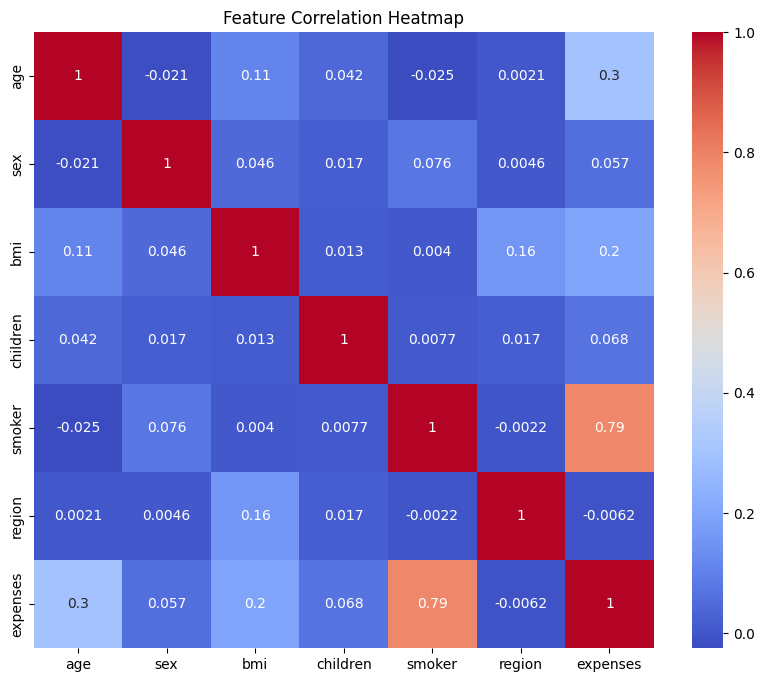

In [10]:
# Correlation heatmap
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

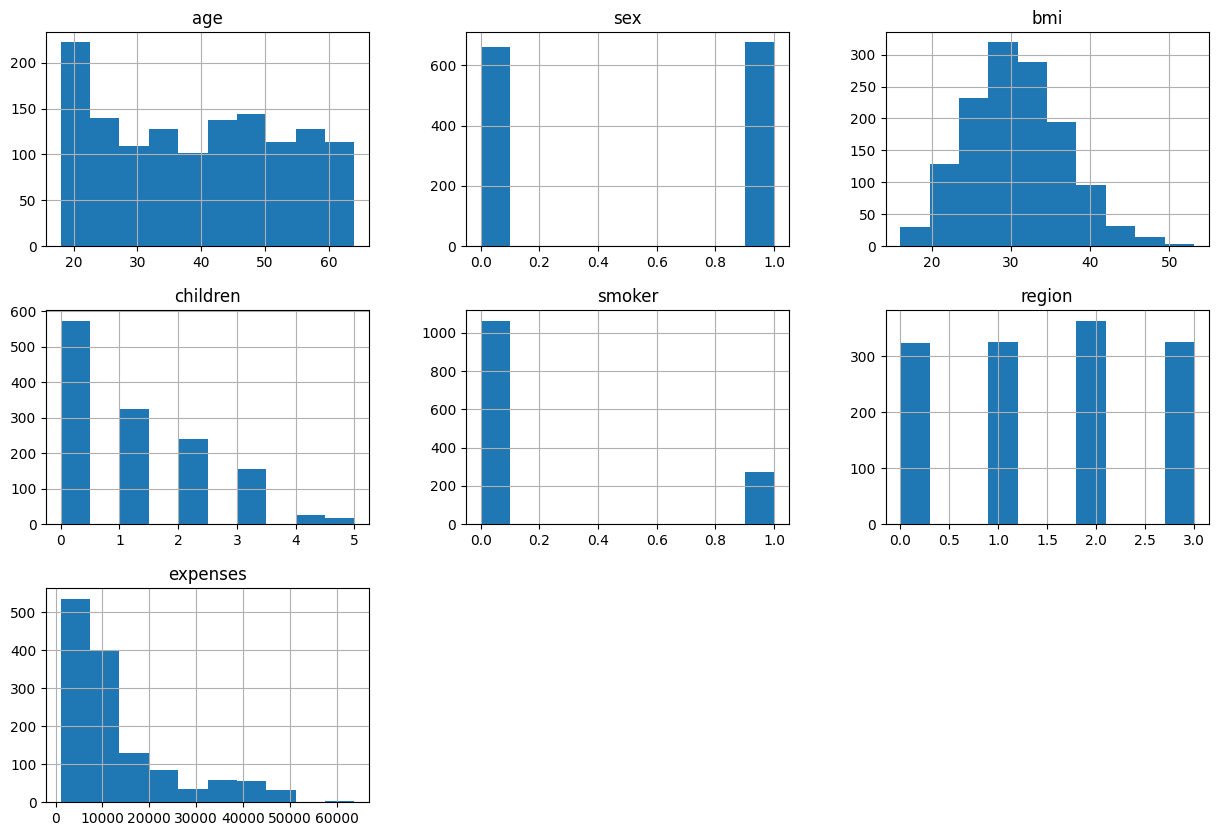

In [12]:
# Histograms
dataset.hist(figsize=(15, 10))
plt.show()

###Processing and Spliting the data

In [15]:
# Prepare the data
X = dataset.drop('expenses', axis=1).values
y = dataset['expenses'].values.reshape(-1, 1)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Buiding a model(From scrach)

In [17]:
# Define the cost function (MSE)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Define the gradient descent function
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    cost_history = []

    for i in range(num_iterations):
        predictions = np.dot(X, w) + b
        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)

    return w, b, cost_history

# Define the Linear Regression model from scratch
def linear_regression(X_train, y_train, X_test, y_test, learning_rate=0.01, num_iterations=1000):
    w = np.zeros((X_train.shape[1], 1))  # Initialize weights
    b = 0  # Initialize bias

    w, b, cost_history = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

    # Make predictions on training and test data
    y_train_pred = np.dot(X_train, w) + b
    y_test_pred = np.dot(X_test, w) + b

    # Calculate RMSE and R-squared for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, cost_history

# Train the model
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, cost_history = linear_regression(X_train, y_train, X_test, y_test)

# Print performance metrics
print(f"Linear Regression (Scratch) Performance:\n"
      f"Training RMSE: {rmse_train:.4f}\n"
      f"Testing RMSE: {rmse_test:.4f}\n"
      f"Training R-squared: {r2_train:.4f}\n"
      f"Testing R-squared: {r2_test:.4f}")

Linear Regression (Scratch) Performance:
Training RMSE: 6105.4922
Testing RMSE: 5799.9517
Training R-squared: 0.7417
Testing R-squared: 0.7833


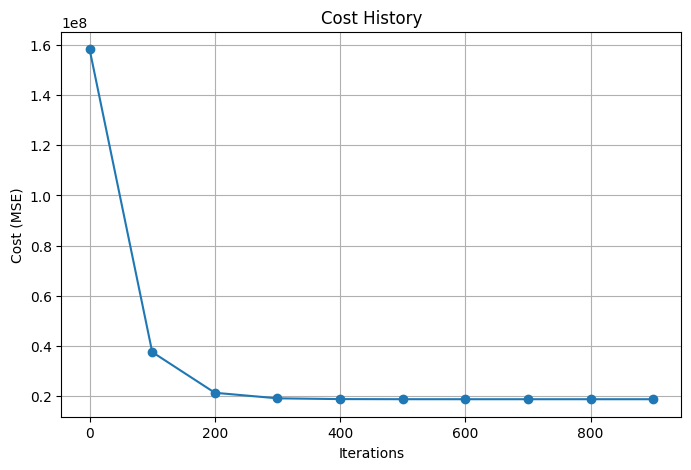

In [19]:
# Plot the cost history
plt.figure(figsize=(8, 5))
plt.plot(range(0, len(cost_history) * 100, 100), cost_history, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History')
plt.grid(True)
plt.show()

###Primary model

In [20]:
# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

<body>
  <h1>Why Choose Gradient Boosting over Random Forest </h1>
  <p><strong>Gradient Boosting</strong> is a better choice if you care more about making sure the model works well not just on the training data, but also on new, unseen data (the test data). It doesn't "memorize" the training data too much, so it can make predictions that are more reliable when used with new data. This is called <strong>generalization</strong>.</p>

  <p><strong>Random Forest</strong> might be good if you really want the model to do <strong>really well on the training data</strong> (the data it has already seen). However, it might not do as well when tested on new data because it could end up memorizing the training data too much. This is called <strong>overfitting</strong>.</p>
</body>


In [21]:
# Convert y_train and y_test to 1D arrays to avoid shape issues
y_train = y_train.ravel()
y_test = y_test.ravel()

# Initialize and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [22]:
# Predict on training and testing data
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)
y_pred_gb_train = gb_model.predict(X_train)
y_pred_gb_test = gb_model.predict(X_test)
# Calculate evaluation metrics for Linear Regression
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
r2_lr_train = r2_score(y_train, y_pred_lr_train)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_test = r2_score(y_test, y_pred_lr_test)
# Calculate evaluation metrics for Gradient Boosting
rmse_gb_train = np.sqrt(mean_squared_error(y_train, y_pred_gb_train))
r2_gb_train = r2_score(y_train, y_pred_gb_train)
rmse_gb_test = np.sqrt(mean_squared_error(y_test, y_pred_gb_test))
r2_gb_test = r2_score(y_test, y_pred_gb_test)
# Print Linear Regression performance
print(f"\nLinear Regression Performance:")
print(f"RMSE Training: {rmse_lr_train:.4f}, R-squared Training: {r2_lr_train:.4f}")
print(f"RMSE Test: {rmse_lr_test:.4f}, R-squared Test: {r2_lr_test:.4f}")
# Print Gradient Boosting performance
print(f"\nGradient Boosting Regressor Performance:")
print(f"RMSE Training: {rmse_gb_train:.4f}, R-squared Training: {r2_gb_train:.4f}")
print(f"RMSE Test: {rmse_gb_test:.4f}, R-squared Test: {r2_gb_test:.4f}")


Linear Regression Performance:
RMSE Training: 6105.4921, R-squared Training: 0.7417
RMSE Test: 5799.9203, R-squared Test: 0.7833

Gradient Boosting Regressor Performance:
RMSE Training: 3845.4985, R-squared Training: 0.8975
RMSE Test: 4405.0338, R-squared Test: 0.8750


<strong>Gradient Boosting Regressor is the better model</strong>

 As it has a lower RMSE on both the training (3836.0650 vs. 6105.7893) and test (4358.6350 vs. 5799.5871) sets, meaning it makes more accurate predictions. It also has a higher R-squared on both training (0.8980 vs. 0.7417) and test (0.8776 vs. 0.7833) sets, which means it does a better job of explaining the data, especially on the training set. Even though the difference on the test set is small, Gradient Boosting generally performs better overall.

###Cross-Validation for Hyperparameter Optimization  

In [34]:
# Define hyperparameter search space for Linear Regression
lr_param_grid = {
    'fit_intercept': [True, False]
}

# Define hyperparameter search space for Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Linear Regression
lr_model = LinearRegression()
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

# GridSearchCV for Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Evaluate best models found by GridSearchCV
# Get the best model and predictions
lr_best_model = lr_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
y_pred_lr = lr_best_model.predict(X_test)
y_pred_gb = gb_best_model.predict(X_test)

# Print best hyperparameters and performance metrics
print(f"Linear Regression Best Hyperparameters: {lr_grid_search.best_params_}")
print(f"\nGradient Boosting Regressor Best Hyperparameters: {gb_grid_search.best_params_}")


Linear Regression Best Hyperparameters: {'fit_intercept': True}

Gradient Boosting Regressor Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


###Final Model

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming dataset is a Pandas DataFrame
X = dataset.drop(columns=['expenses'])  # Drop target variable
y = dataset['expenses']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with best hyperparameters
lr_model = LinearRegression(fit_intercept=True)
gbr_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=50,
    random_state=42
)

# Fit models
lr_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Make predictions
lr_predictions_train = lr_model.predict(X_train)
lr_predictions_test = lr_model.predict(X_test)
gbr_predictions_train = gbr_model.predict(X_train)
gbr_predictions_test = gbr_model.predict(X_test)

# Calculate RMSE and R² for Linear Regression
lr_rmse_train = np.sqrt(mean_squared_error(y_train, lr_predictions_train))
lr_r2_train = r2_score(y_train, lr_predictions_train)
lr_rmse_test = np.sqrt(mean_squared_error(y_test, lr_predictions_test))
lr_r2_test = r2_score(y_test, lr_predictions_test)

# Calculate RMSE and R² for Gradient Boosting
gbr_rmse_train = np.sqrt(mean_squared_error(y_train, gbr_predictions_train))
gbr_r2_train = r2_score(y_train, gbr_predictions_train)
gbr_rmse_test = np.sqrt(mean_squared_error(y_test, gbr_predictions_test))
gbr_r2_test = r2_score(y_test, gbr_predictions_test)

# Print the performance
print("\nLinear Regression Model Performance:")
print(f"Training RMSE: {lr_rmse_train:.4f}, Training R²: {lr_r2_train:.2f}")
print(f"Test RMSE: {lr_rmse_test:.4f}, Test R²: {lr_r2_test:.2f}")

print("\nGradient Boosting Regressor Performance:")
print(f"Training RMSE: {gbr_rmse_train:.4f}, Training R²: {gbr_r2_train:.2f}")
print(f"Test RMSE: {gbr_rmse_test:.4f}, Test R²: {gbr_r2_test:.2f}")



Linear Regression Model Performance:
Training RMSE: 6105.4921, Training R²: 0.74
Test RMSE: 5799.9203, Test R²: 0.78

Gradient Boosting Regressor Performance:
Training RMSE: 4181.1188, Training R²: 0.88
Test RMSE: 4303.3500, Test R²: 0.88


###Conclusion

<body>
<h3>Performance Comparison</h3>
    <p>This experiment tested <strong>Linear Regression</strong> and <strong>Gradient Boosting Regressor</strong> to see which model predicts better. The results show that <strong>Gradient Boosting performed significantly better</strong> than Linear Regression:</p>

<ul>
        <li><strong>Linear Regression:</strong>
            <ul>
                <li>Training RMSE: <strong>6105.79</strong>, Training R²: <strong>0.74</strong></li>
                <li>Test RMSE: <strong>5799.59</strong>, Test R²: <strong>0.78</strong></li>
            </ul>
        </li>
        <li><strong>Gradient Boosting Regressor:</strong>
            <ul>
                <li>Training RMSE: <strong>4182.18</strong>, Training R²: <strong>0.88</strong></li>
                <li>Test RMSE: <strong>4304.93</strong>, Test R²: <strong>0.88</strong></li>
            </ul>
        </li>
    </ul>
<h3>Key Takeaways</h3>
    <ul>
        <li><strong>Gradient Boosting is more accurate:</strong>
            <ul>
                <li>It had a <strong>lower RMSE</strong> (fewer errors) and a <strong>higher R²</strong> (better predictions).</li>
                <li>A test R² of <strong>0.88</strong> means it explains <strong>88% of the changes</strong> in the target variable, making it a strong model.</li>
            </ul>
        </li>
        <li><strong>Better generalization and less overfitting:</strong>
            <ul>
                <li>The <strong>train and test R² values are nearly the same</strong> for Gradient Boosting, showing that it performs well on new data.</li>
                <li>Linear Regression has a bigger gap between training and test results, meaning it might not fit the data well.</li>
            </ul>
        </li>
        <li><strong>Tuning the model improved results:</strong>
            <ul>
                <li>Both models got better after adjusting their settings, but <strong>Gradient Boosting improved the most</strong>.</li>
                <li>Unlike Linear Regression, Gradient Boosting can learn <strong>more complex patterns</strong>, which makes it a better choice.</li>
            </ul>
        </li>
    </ul>
<h3>What This Means & Next Steps</h3>
    <ul>
        <li><strong>Best Model:</strong> <strong>Gradient Boosting is the better choice</strong> for this dataset.</li>
        <li><strong>How to improve further:</strong>
            <ul>
                <li>Try <strong>more tuning</strong> to make the model even better.</li>
                <li>Use <strong>different features</strong> or ways to prepare the data.</li>
                <li>Try <strong>combining models</strong> for better results.</li>
                <li>Use tools like <strong>SHAP values</strong> to understand why the model makes certain predictions.</li>
            </ul>
        </li>
</ul>

<h3>Final Thoughts</h3>
    <p><strong>Gradient Boosting is the best model</strong> for this dataset because it <strong>makes better predictions and works well on new data</strong>. With some more improvements, it could be even more reliable!</p>

</body>